In [123]:
import numpy as np
import pandas as pd
import os

# 일관된 출력을 위해 유사난수 초기화
np.random.seed(42)

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# 한글출력
matplotlib.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

# 그림을 저장할 폴드
PROJECT_ROOT_DIR = "."
# CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [124]:
df_train = pd.read_csv("../8th_week/data/train2.csv")
df_test = pd.read_csv("../8th_week/data/test2.csv")
df_train.head()
#df_test.head()

# TripType - a categorical id representing the type of shopping trip the customer made. This is the ground truth that you are predicting. TripType_999 is an "other" category.
# VisitNumber - an id corresponding to a single trip by a single customer
# Weekday - the weekday of the trip
# Upc - the UPC number of the product purchased
# ScanCount - the number of the given item that was purchased. A negative value indicates a product return.
# DepartmentDescription - a high-level description of the item's department
# FinelineNumber - a more refined category for each of the products, created by Walmart

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,999,5,Friday,6.811315e+10,-1,FINANCIAL SERVICES,1000.0
1,30,7,Friday,6.053882e+10,1,SHOES,8931.0
2,30,7,Friday,7.410811e+09,1,PERSONAL CARE,4504.0
3,26,8,Friday,2.238404e+09,2,PAINT AND ACCESSORIES,3565.0
4,26,8,Friday,2.006614e+09,2,PAINT AND ACCESSORIES,1017.0


# step1. EDA

In [125]:
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647054 entries, 0 to 647053
Data columns (total 7 columns):
TripType                 647054 non-null int64
VisitNumber              647054 non-null int64
Weekday                  647054 non-null object
Upc                      642925 non-null float64
ScanCount                647054 non-null int64
DepartmentDescription    645693 non-null object
FinelineNumber           642925 non-null float64
dtypes: float64(2), int64(3), object(2)
memory usage: 34.6+ MB


In [126]:
print('Dataframe dimensions:', df_train.shape)

Dataframe dimensions: (647054, 7)


In [127]:
# 숫자형 특성의 요약정보
df_train.describe()

,TripType,VisitNumber,Upc,ScanCount,FinelineNumber
count,647054.000000,647054.000000,6.429250e+05,647054.000000,642925.000000
mean,58.584511,96167.640078,3.060698e+10,1.108878,3726.884567
std,157.635533,55545.485154,9.120134e+10,0.700776,2780.966158
min,3.000000,5.000000,8.340000e+02,-12.000000,0.000000
25%,27.000000,49268.000000,3.400001e+09,1.000000,1404.000000
50%,39.000000,97074.000000,7.050103e+09,1.000000,3352.000000
75%,40.000000,144316.000000,3.006531e+10,1.000000,5501.000000
max,999.000000,191347.000000,9.789707e+11,71.000000,9998.000000


In [128]:
# 범주형 특성의 정보
df_train["Weekday"].value_counts()

Sunday       133975
Saturday     122096
Friday        96247
Monday        83130
Tuesday       72529
Wednesday     71115
Thursday      67962
Name: Weekday, dtype: int64

(array([0.24791079, 0.21412432, 0.        , 0.31449204, 0.        ,
        0.34508969, 0.17505494, 0.        , 0.18681851, 0.18317637]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <a list of 10 Patch objects>)

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


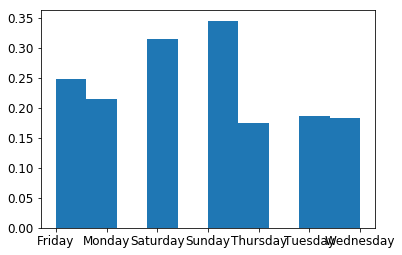

In [129]:
plt.hist(df_train.Weekday, normed=True)

In [130]:
df_train["DepartmentDescription"].value_counts()

GROCERY DRY GOODS              70402
DSD GROCERY                    68332
PRODUCE                        51115
DAIRY                          43820
PERSONAL CARE                  41969
IMPULSE MERCHANDISE            28712
HOUSEHOLD CHEMICALS/SUPP       24880
PHARMACY OTC                   23306
FROZEN FOODS                   21101
HOUSEHOLD PAPER GOODS          16274
COMM BREAD                     15244
BEAUTY                         14865
MENS WEAR                      12250
FINANCIAL SERVICES             10723
INFANT CONSUMABLE HARDLINES    10646
SERVICE DELI                   10127
CANDY, TOBACCO, COOKIES         9808
PETS AND SUPPLIES               9761
MEAT - FRESH & FROZEN           9477
PRE PACKED DELI                 9052
LADIESWEAR                      8721
CELEBRATION                     8698
COOK AND DINE                   7600
BAKERY                          7168
OFFICE SUPPLIES                 6578
HOME MANAGEMENT                 6349
TOYS                            6107
S

(array([0.00797779, 0.00635323, 0.03256206, 0.02548519, 0.01892628,
        0.0077421 , 0.00797188, 0.01813468, 0.0167099 , 0.00519572]),
 array([-1. ,  5.8, 12.6, 19.4, 26.2, 33. , 39.8, 46.6, 53.4, 60.2, 67. ]),
 <a list of 10 Patch objects>)

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


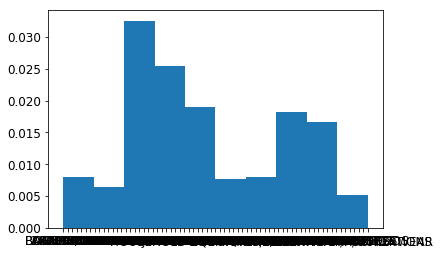

In [131]:
plt.hist(df_train.DepartmentDescription, normed=True)

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


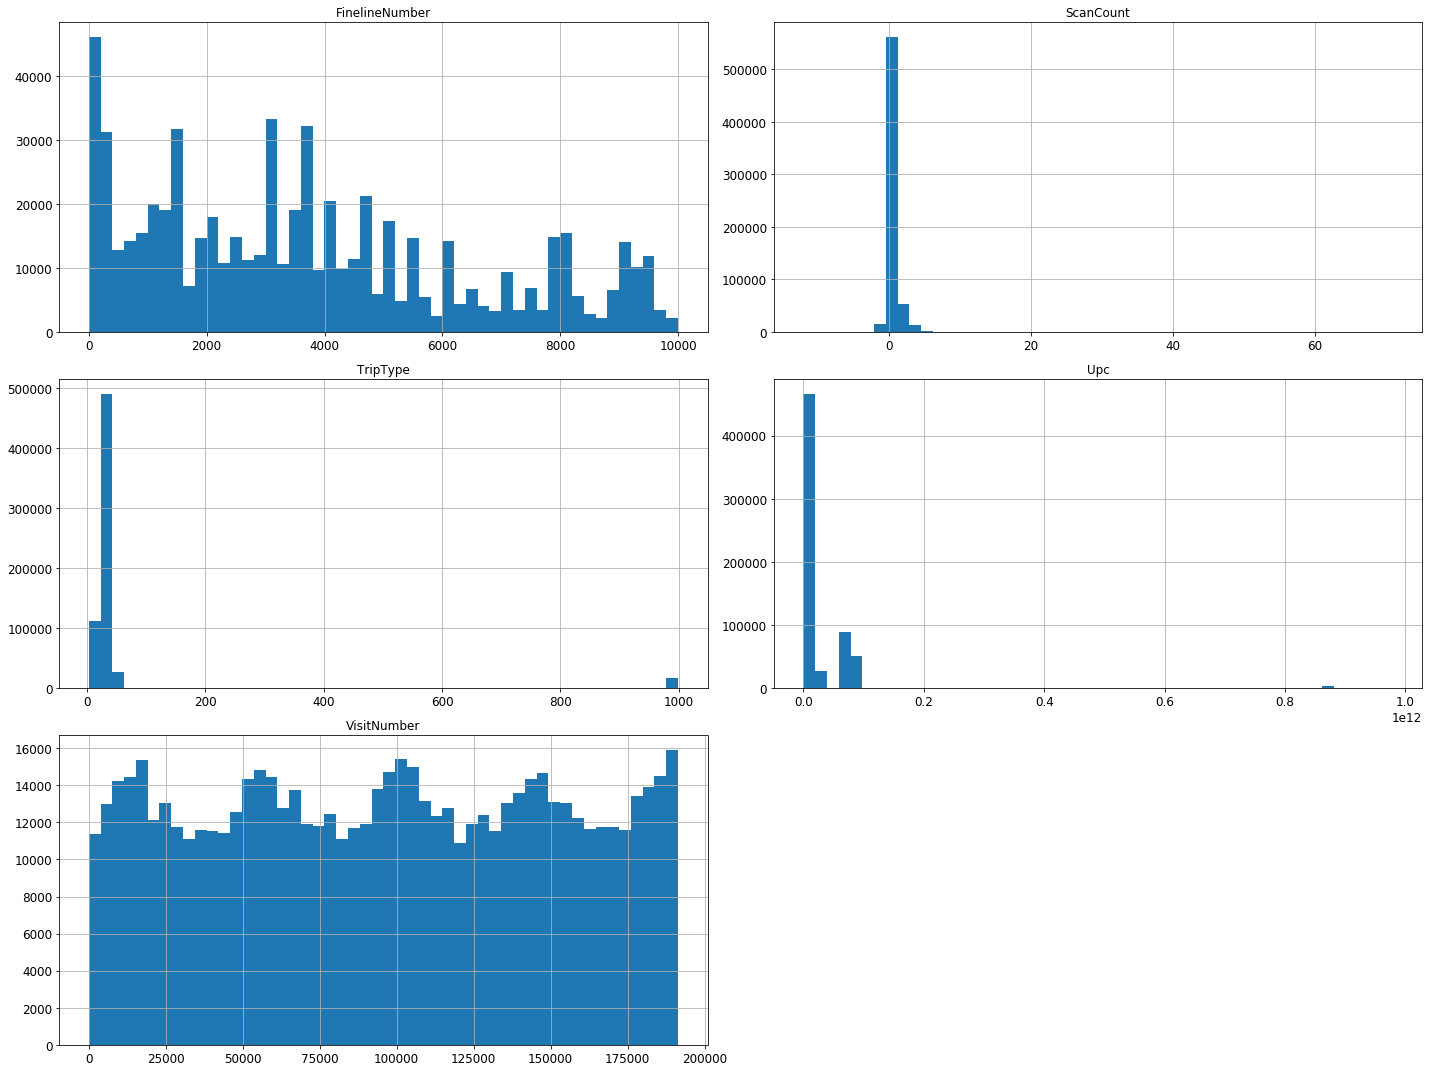

In [132]:
df_train.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

In [133]:
corr_matrix = df_train.corr()
corr_matrix["TripType"].sort_values(ascending=False)

TripType          1.000000
Upc               0.047150
VisitNumber       0.000805
FinelineNumber   -0.028604
ScanCount        -0.286024
Name: TripType, dtype: float64

In [134]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df_train, df_train["TripType"]):
    strat_train_set = df_train.loc[train_index]
    strat_test_set = df_train.loc[test_index]

In [135]:
walmart = strat_train_set.drop("TripType", axis=1) # 훈련 세트를 위해 레이블 삭제
walmart_labels = strat_train_set["TripType"].copy()

In [136]:
df_train.dropna(axis = 0, subset = ['Upc', 'DepartmentDescription', 'FinelineNumber'], inplace = True)
print('Dataframe dimensions:', df_train.shape)

Dataframe dimensions: (642925, 7)


In [137]:
walmart_cat = walmart.select_dtypes(include=[np.object])
walmart_cat

,Weekday,DepartmentDescription
88208,Monday,DSD GROCERY
607352,Saturday,COMM BREAD
579637,Friday,PERSONAL CARE
457325,Friday,GROCERY DRY GOODS
395375,Tuesday,DSD GROCERY
165185,Saturday,PHARMACY OTC
341931,Sunday,DSD GROCERY
551326,Wednesday,BEAUTY
465794,Saturday,HOME MANAGEMENT
435982,Thursday,DSD GROCERY


In [138]:
walmart_num = walmart.select_dtypes(include=[np.number])
walmart_num


,VisitNumber,Upc,ScanCount,FinelineNumber
88208,25129,4.400003e+09,1,2759.0
607352,181080,7.874237e+09,1,3714.0
579637,172921,1.150904e+09,1,1405.0
457325,136410,5.844989e+09,1,3601.0
395375,116814,6.112691e+10,2,3467.0
165185,50148,7.007463e+09,1,5622.0
341931,101822,7.978392e+09,1,3866.0
551326,163692,7.124931e+09,-1,2235.0
465794,139021,1.764107e+09,1,1066.0
435982,129812,2.840042e+09,1,9257.0


In [139]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse

class CategoricalEncoder(BaseEstimator, TransformerMixin):
    """Encode categorical features as a numeric array.
    The input to this transformer should be a matrix of integers or strings,
    denoting the values taken on by categorical (discrete) features.
    The features can be encoded using a one-hot aka one-of-K scheme
    (``encoding='onehot'``, the default) or converted to ordinal integers
    (``encoding='ordinal'``).
    This encoding is needed for feeding categorical data to many scikit-learn
    estimators, notably linear models and SVMs with the standard kernels.
    Read more in the :ref:`User Guide <preprocessing_categorical_features>`.
    Parameters
    ----------
    encoding : str, 'onehot', 'onehot-dense' or 'ordinal'
        The type of encoding to use (default is 'onehot'):
        - 'onehot': encode the features using a one-hot aka one-of-K scheme
          (or also called 'dummy' encoding). This creates a binary column for
          each category and returns a sparse matrix.
        - 'onehot-dense': the same as 'onehot' but returns a dense array
          instead of a sparse matrix.
        - 'ordinal': encode the features as ordinal integers. This results in
          a single column of integers (0 to n_categories - 1) per feature.
    categories : 'auto' or a list of lists/arrays of values.
        Categories (unique values) per feature:
        - 'auto' : Determine categories automatically from the training data.
        - list : ``categories[i]`` holds the categories expected in the ith
          column. The passed categories are sorted before encoding the data
          (used categories can be found in the ``categories_`` attribute).
    dtype : number type, default np.float64
        Desired dtype of output.
    handle_unknown : 'error' (default) or 'ignore'
        Whether to raise an error or ignore if a unknown categorical feature is
        present during transform (default is to raise). When this is parameter
        is set to 'ignore' and an unknown category is encountered during
        transform, the resulting one-hot encoded columns for this feature
        will be all zeros.
        Ignoring unknown categories is not supported for
        ``encoding='ordinal'``.
    Attributes
    ----------
    categories_ : list of arrays
        The categories of each feature determined during fitting. When
        categories were specified manually, this holds the sorted categories
        (in order corresponding with output of `transform`).
    Examples
    --------
    Given a dataset with three features and two samples, we let the encoder
    find the maximum value per feature and transform the data to a binary
    one-hot encoding.
    >>> from sklearn.preprocessing import CategoricalEncoder
    >>> enc = CategoricalEncoder(handle_unknown='ignore')
    >>> enc.fit([[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]])
    ... # doctest: +ELLIPSIS
    CategoricalEncoder(categories='auto', dtype=<... 'numpy.float64'>,
              encoding='onehot', handle_unknown='ignore')
    >>> enc.transform([[0, 1, 1], [1, 0, 4]]).toarray()
    array([[ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.],
           [ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]])
    See also
    --------
    sklearn.preprocessing.OneHotEncoder : performs a one-hot encoding of
      integer ordinal features. The ``OneHotEncoder assumes`` that input
      features take on values in the range ``[0, max(feature)]`` instead of
      using the unique values.
    sklearn.feature_extraction.DictVectorizer : performs a one-hot encoding of
      dictionary items (also handles string-valued features).
    sklearn.feature_extraction.FeatureHasher : performs an approximate one-hot
      encoding of dictionary items or strings.
    """

    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):
        """Fit the CategoricalEncoder to X.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_feature]
            The data to determine the categories of each feature.
        Returns
        -------
        self
        """

        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        """Transform X using one-hot encoding.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_features]
            The data to encode.
        Returns
        -------
        X_out : sparse matrix or a 2-d array
            Transformed input.
        """
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Set the problematic rows to an acceptable value and
                    # continue `The rows are marked `X_mask` and will be
                    # removed later.
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out

In [140]:
cat_encoder = CategoricalEncoder()
walmart_cat_reshaped = walmart_cat.values.reshape(-1, 1)
walmart_cat_1hot = cat_encoder.fit_transform(walmart_cat_reshaped.astype(str))
walmart_cat_1hot

<1035286x76 sparse matrix of type '<class 'numpy.float64'>'
	with 1035286 stored elements in Compressed Sparse Row format>

In [141]:
walmart_cat_1hot.toarray()


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [142]:
from sklearn.base import BaseEstimator, TransformerMixin

# 사이킷런이 DataFrame을 바로 사용하지 못하므로
# 수치형이나 범주형 컬럼을 선택하는 클래스를 만듭니다.
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [143]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_attribs = list(walmart_num)
cat_attribs = list(walmart_cat)

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('cat_encoder', CategoricalEncoder(encoding="onehot-dense")),
    ])

In [144]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

In [145]:
walmart_prepared = full_pipeline.fit_transform(walmart.astype(str))
walmart_prepared

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:585: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:585: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-1.27880709, -0.28742651, -0.15539139, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.52936172, -0.24923376, -0.15539139, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.38244474, -0.32314432, -0.15539139, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.46785984, -0.28280831, -0.15539139, ...,  0.        ,
         0.        ,  0.        ],
       [-1.29944282, -0.25314443, -0.15539139, ...,  0.        ,
         0.        ,  0.        ],
       [-1.68595745,  0.3996757 , -0.15539139, ...,  0.        ,
         0.        ,  0.        ]])

In [146]:
walmart_prepared.shape

(517643, 80)

In [147]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(walmart_prepared, walmart_labels)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
#pivot_table = pd.pivot_table(df_train, index=["VisitNumber"], columns=["DepartmentDescription"], fill_value=0, aggfunc=len, margins=True)

In [ ]:
#pivot_table.query('VisitNumber == 12')

In [ ]:
#from sklearn.feature_extraction.text import CountVectorizer

#vect = CountVectorizer()
#vect.fit(pivot_table)
#vect.vocabulary_

In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# frequent_itemsets = apriori(pivot_table, min_support=0.07, use_colnames=True)


In [ ]:
# rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
# rules.head()